# The Assumptions Of Linear Regression, And How To Test Them


# Assumption 1: Linear functional form


## y = β*X + ϵ

In [39]:
import pandas as pd
from patsy import dmatrices
from matplotlib import pyplot as plt
import numpy as np
 

In [40]:
df = pd.read_csv('PowerPlant.csv')
df.head()

,Ambient_Temperature,Volume,Ambient_Pressure,Relative_Humidity,Power_Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


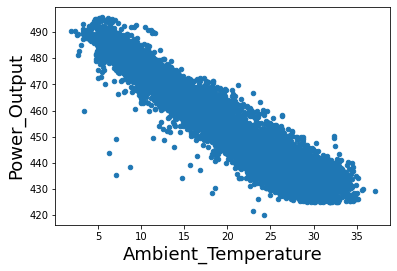

In [41]:
df.plot.scatter(x='Ambient_Temperature', y='Power_Output')
plt.xlabel('Ambient_Temperature', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

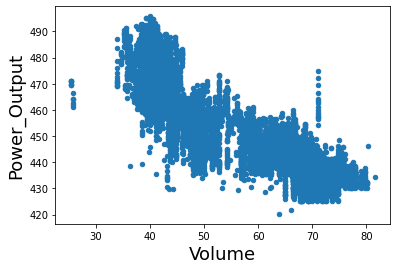

In [42]:
df.plot.scatter(x='Volume', y='Power_Output')
plt.xlabel('Volume', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

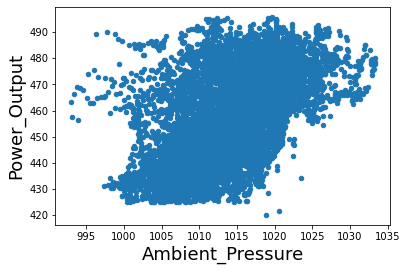

In [43]:
df.plot.scatter(x='Ambient_Pressure', y='Power_Output')
plt.xlabel('Ambient_Pressure', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

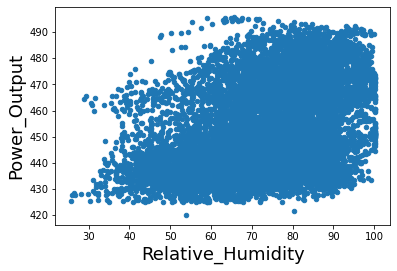

In [44]:
df.plot.scatter(x='Relative_Humidity', y='Power_Output')
plt.xlabel('Relative_Humidity', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

In [45]:
df.corr()['Power_Output']

Ambient_Temperature   -0.948128
Volume                -0.869780
Ambient_Pressure       0.518429
Relative_Humidity      0.389794
Power_Output           1.000000
Name: Power_Output, dtype: float64

# Ambient Temperature has LINEAR RELATIONSHIP with Power Output

# Volumen has MOSTLY LINEAR RELATIONSHIP with Power Output

# Ambient Pressure has NOT VERY LINEAR RELATIONSHIP with Power Output

# Relative Humidity has NON LINEAR RELATIONSHIP with Power Output


# Assumption 2 - Statistical independence of the errors (in particular, no correlation between  errors )

### Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations 
### which describe the relationship between one or more independent quantitative variables and 
### a dependent variable (simple or multiple linear regression)

In [58]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('Power_Output ~ Ambient_Temperature + Volume + Ambient_Pressure + Relative_Humidity', data=df).fit()



In [59]:
print(model.resid)

0       3.370484
1       0.507832
2       0.369021
3      -2.579000
4      -5.117144
          ...   
9563   -1.964722
9564    9.309817
9565    2.577112
9566   -3.048216
9567    4.328675
Length: 9568, dtype: float64


In [60]:
durbin_watson(model.resid)

1.9938672193790345

# The test statistic is 1.99. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.